In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Airbnb Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(20), object(62)
memory usage: 6.6+ MB


In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,2.019100e+13,10/14/19,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,f,f,moderate,f,f,1,1,0,0,1.74
1,3850,https://www.airbnb.com/rooms/3850,2.019100e+13,10/14/19,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
2,5858,https://www.airbnb.com/rooms/5858,2.019100e+13,10/14/19,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.87
3,7918,https://www.airbnb.com/rooms/7918,2.019100e+13,10/14/19,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8142,https://www.airbnb.com/rooms/8142,2.019100e+13,10/14/19,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


# Data Cleaning

In [18]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
# checking percentage of missing values
missing_percentage = (missing_values/ len(df)) * 100
# cheking for duplicates
duplicate_rows = df.duplicated().sum()
# display the column with missing values and their percentage as well as no. of duplicate rows
missing_data_info = pd.DataFrame({'Missing Values' : missing_values, 'Percentage': missing_percentage})
missing_data_info_filtered = missing_data_info[missing_data_info['Missing Values'] > 0].sort_values(by='Percentage',ascending=False)

duplicate_rows, missing_data_info_filtered.head(10)

(0,
                               Missing Values  Percentage
 neighbourhood_group_cleansed            8111  100.000000
 thumbnail_url                           8111  100.000000
 host_acceptance_rate                    8111  100.000000
 xl_picture_url                          8111  100.000000
 medium_url                              8111  100.000000
 square_feet                             7987   98.471212
 monthly_price                           7067   87.128591
 weekly_price                            7042   86.820367
 notes                                   3108   38.318333
 license                                 3011   37.122426)

### The dataset has no duplicate rows. However, some columns have a significant amount of missing data:

### Columns such as neighbourhood_group_cleansed, thumbnail_url, host_acceptance_rate, and others have 100% missing values.
### Columns like square_feet, monthly_price, and weekly_price also have a high percentage of missing data (above 85%).

In [22]:
## Dropping columns with more than 80% missing values
columns_to_drop = missing_data_info_filtered[missing_data_info_filtered['Percentage'] > 80].index
airbnb_cleaned_data = df.drop(columns=columns_to_drop)

#checking the remaining columns for missing values after droping
remaining_missing_values = airbnb_cleaned_data.isnull().sum()
remaining_missing_info = remaining_missing_values[remaining_missing_values > 0].sort_values(ascending= False)

remaining_missing_info.head(10)

notes                    3108
license                  3011
access                   2911
interaction              2624
transit                  2415
house_rules              2176
host_about               2031
neighborhood_overview    2018
security_deposit         1692
review_scores_value      1655
dtype: int64

### Several columns still contain missing values, though at more manageable levels. These are mostly textual fields like notes, license, access, and host_about, along with a few numeric fields such as security_deposit and review_scores_value.

## We'll handle the missing values by:

Text fields: Fill missing values with "Not provided".

Numeric fields: Impute missing values based on the median or mode where appropriate.

In [23]:
text_columns = ['notes', 'license', 'access', 'interaction', 'transit', 'house_rules', 'host_about', 'neighborhood_overview']
airbnb_cleaned_data[text_columns] = airbnb_cleaned_data[text_columns].fillna('Not provided')

numeric_columns = ['security_deposit', 'review_scores_value']
airbnb_cleaned_data[numeric_columns] = airbnb_cleaned_data[numeric_columns].fillna(airbnb_cleaned_data[numeric_columns].median())

airbnb_cleaned_data.isnull().sum().sum()

C:\Users\Suchita\AppData\Local\Temp\ipykernel_19368\1009818701.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb_cleaned_data[numeric_columns] = airbnb_cleaned_data[numeric_columns].fillna(airbnb_cleaned_data[numeric_columns].median())


21577

In [24]:
text_columns = ['notes', 'license', 'access', 'interaction', 'transit', 'house_rules', 'host_about', 'neighborhood_overview']
airbnb_cleaned_data[text_columns] = airbnb_cleaned_data[text_columns].fillna('Not provided')

numeric_columns = ['security_deposit', 'review_scores_value']
airbnb_cleaned_data[numeric_columns] = airbnb_cleaned_data[numeric_columns].fillna(airbnb_cleaned_data[numeric_columns].median())

airbnb_cleaned_data.isnull().sum()

C:\Users\Suchita\AppData\Local\Temp\ipykernel_19368\265637935.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb_cleaned_data[numeric_columns] = airbnb_cleaned_data[numeric_columns].fillna(airbnb_cleaned_data[numeric_columns].median())


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1605
Length: 98, dtype: int64

# Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

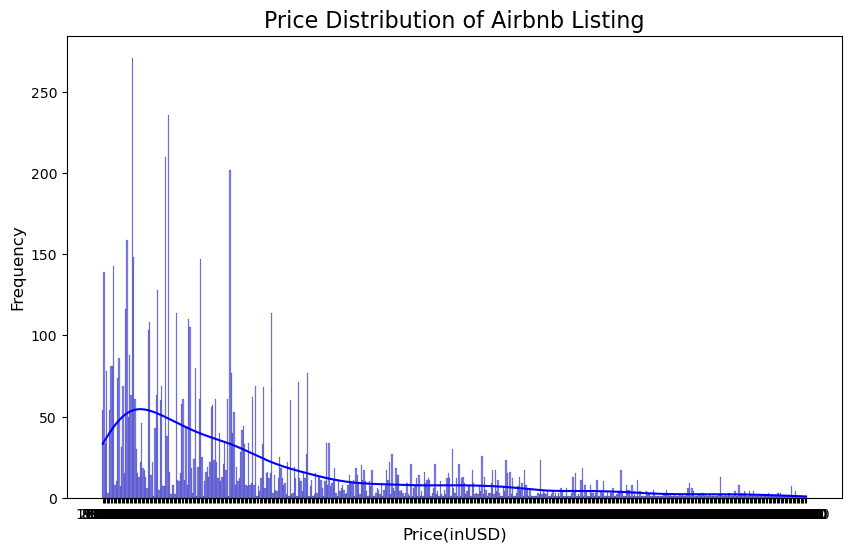

In [30]:
#price distribution

#convert price to numeric, and remove symbols
airbnb_cleaned_data['price'] = airbnb_cleaned_data['price'].replace({'\$': '', ',': ''}, regex=True)

#plot
plt.figure(figsize=(10,6))
sns.histplot(airbnb_cleaned_data['price'], bins=50, kde=True, color='blue')

plt.title('Price Distribution of Airbnb Listing', fontsize=16)
plt.xlabel('Price(inUSD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

### The price distribution is heavily right-skewed, meaning that most listings are concentrated at the lower end of the price spectrum, with fewer high-priced listings
### long tail indicates a few listings with very high prices, which are outliers compared to the majority
### There are peaks around specific price points, suggesting that many listings cluster around these common price levels, possibly due to standard pricing strategies

# Analyze the relationship between prices and other features

In [35]:
# Convert price to numeric, removing symbols if needed
airbnb_cleaned_data['price'] = airbnb_cleaned_data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

airbnb_cleaned_data['number_of_reviews'] = pd.to_numeric(airbnb_cleaned_data['number_of_reviews'], errors='coerce')
airbnb_cleaned_data['availability_365'] = pd.to_numeric(airbnb_cleaned_data['availability_365'], errors='coerce')

# Check for any remaining non-numeric values and drop rows with NaN in these columns
airbnb_cleaned_data = airbnb_cleaned_data.dropna(subset=['price', 'number_of_reviews', 'availability_365'])

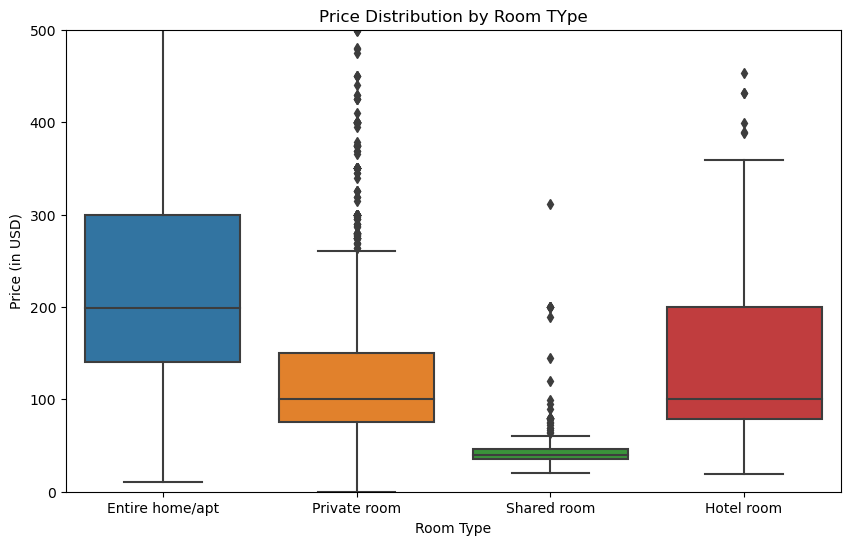

In [37]:
#Room Type vs. Price

plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data= airbnb_cleaned_data)
plt.ylim(0, 500) # limit the y axis to focus on the main range
plt.title('Price Distribution by Room TYpe')
plt.xlabel('Room Type')
plt.ylabel('Price (in USD)')

plt.show()

### Entire Home/Apt: Typically has higher prices with a broader range of values.
### Private Room: Lower median price compared to entire homes/apartments but has many outliers.
### Shared Room: Lowest prices, with a tighter distribution and fewer outliers.
### Hotel Room: Falls between private and entire home prices, indicating variability in hotel room pricing.

## Entire homes are priced higher, likely due to offering more privacy and amenities. Shared rooms are budget-friendly options.


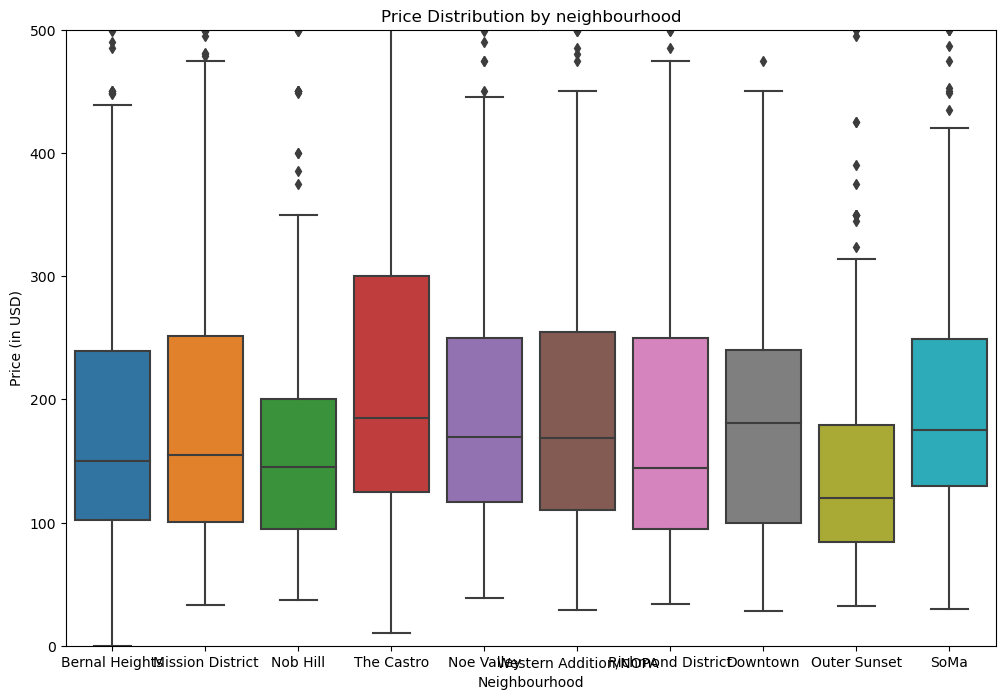

In [41]:
# Neighborhood vs. Price

plt.figure(figsize=(12,8))
top_neighborhoods = airbnb_cleaned_data['neighbourhood'].value_counts().nlargest(10).index
sns.boxplot(x='neighbourhood', y= 'price', data=airbnb_cleaned_data[airbnb_cleaned_data['neighbourhood'].isin(top_neighborhoods)])
plt.ylim(0,500)
plt.title('Price Distribution by neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price (in USD)')

plt.show()

### Significant variability in prices between neighborhoods.
### The Castro and Nob Hill neighborhoods show higher median prices.
### Outliers exist in most neighborhoods, reflecting high-end listings.

## Price variations across neighborhoods can be linked to location desirability, amenities, and proximity to attractions

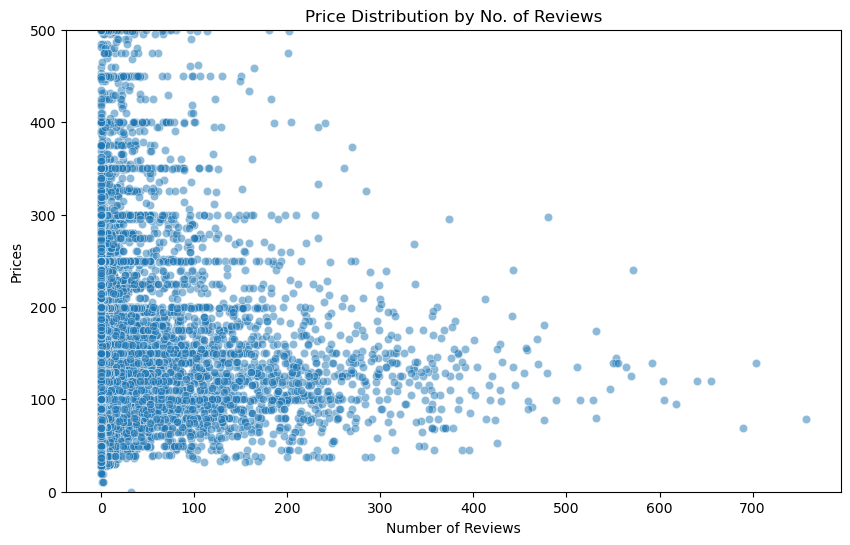

In [42]:
# Number of Reviews vs. Price

plt.figure(figsize=(10,6))
sns.scatterplot(x= 'number_of_reviews', y= 'price', data= airbnb_cleaned_data, alpha=0.5)
plt.ylim(0,500)
plt.title('Price Distribution by No. of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Prices')

plt.show()

### listings with fewer reviews have a broad range of prices.
### As the number of reviews increases, the range of prices becomes narrower, possibly indicating stable, well-reviewed properties.

## Higher reviews might indicate popularity, but not necessarily higher prices. Listings with extreme prices tend to have lower reviews

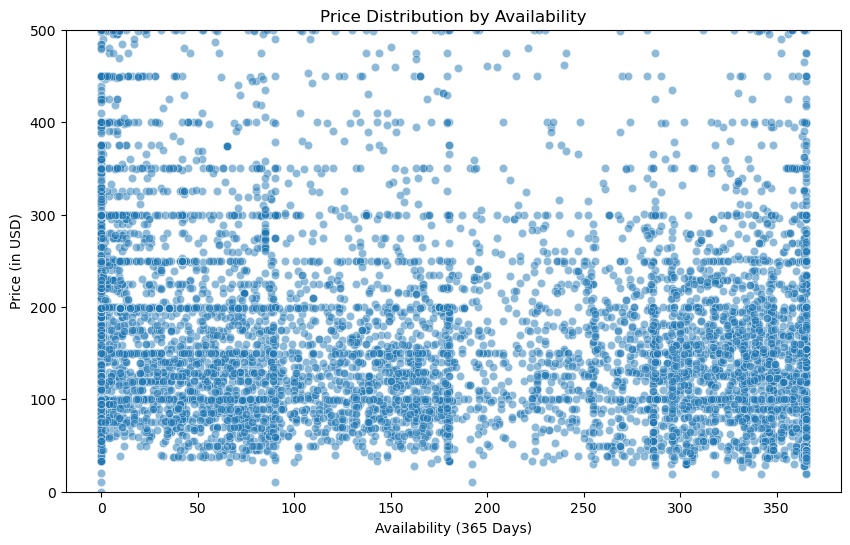

In [44]:
#Availability vs. Price

plt.figure(figsize=(10,6))
sns.scatterplot(x= 'availability_365', y= 'price', data=airbnb_cleaned_data, alpha=0.5)
plt.ylim(0,500)
plt.title('Price Distribution by Availability')
plt.xlabel('Availability (365 Days)')
plt.ylabel('Price (in USD)')

plt.show()

### Listings available year-round (high availability) tend to have more diverse pricing.
### Properties with limited availability show clustered pricing, likely seasonal or high-demand listings

## Properties with high availability might cater to different target groups, including long-term stays or vacation rentals, affecting pricing strategy